In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [39]:
data = pd.read_csv("results/A/A_f_4_d_5.csv")
data

,Iteration,Settlements,Population,AveResources,MaxLoad,PeerTransfer,SubTransfer,Egalitarianism
0,0,10,1000,0.000000,0.000000,1.000000,1.000000,NaN
1,1,10,995,0.019989,0.689594,1.000000,1.000000,1.233870
2,2,10,995,0.027357,1.088662,0.999928,0.999890,1.272488
3,3,10,1000,0.031452,1.204307,0.999930,0.999651,1.316735
4,4,10,1011,0.033281,1.204307,0.999608,0.998813,1.343509
...,...,...,...,...,...,...,...,...
9995,9995,3,1498,0.026435,248.186645,0.416301,0.428472,1.760474
9996,9996,3,1514,0.025398,248.186645,0.417160,0.424194,1.741675
9997,9997,3,1529,0.025297,248.186645,0.418093,0.423580,1.723600
9998,9998,3,1547,0.023780,248.186645,0.417347,0.421120,1.710334


In [40]:
dataframes = []

for type in ["D"]: # ["A", "D", "S"]:
    path = f"results/{type}/"
    for file in os.listdir(path):
        data = pd.read_csv(path + file)
        
        # data = data.tail(1)
        data = pd.DataFrame([data.mean()])

        parts = file.split(".")[0].split("_")
        data["f"] = int(parts[2])
        data["d"] = int(parts[4])
        # data["Egalitarianism"] = data["Egalitarianism"].fillna(0)
        data["Cooperation"] = (data["PeerTransfer"] + data["SubTransfer"]) / 2
        dataframes.append(data)

dataframe = pd.concat(dataframes)
dataframe

,Iteration,Settlements,Population,AveResources,MaxLoad,PeerTransfer,SubTransfer,Egalitarianism,f,d,Cooperation
0,4999.5,3.1021,1716.4058,0.855623,293.499642,0.740302,0.730311,inf,0,0,0.735306
0,4999.5,3.1220,1682.5876,0.185960,265.670840,0.777513,0.786612,inf,0,1,0.782063
0,4999.5,2.9470,1703.4991,0.075821,279.639997,0.699065,0.726161,inf,0,2,0.712613
0,4999.5,3.2135,1713.0010,0.046499,279.649621,0.740024,0.739910,inf,0,3,0.739967
0,4999.5,4.4272,1698.4338,0.033407,302.696204,0.738108,0.732515,1.612276,0,4,0.735312
...,...,...,...,...,...,...,...,...,...,...,...
0,4999.5,3.1859,2550.3038,0.052533,288.504182,0.729276,0.737893,1.608945,7,5,0.733585
0,4999.5,4.3406,2540.8962,0.037436,293.056987,0.672579,0.738661,1.607193,7,6,0.705620
0,4999.5,4.9348,2527.7444,0.023497,287.583632,0.708014,0.720202,1.613261,7,7,0.714108
0,4999.5,3.6705,2528.1860,0.013729,262.579383,0.749474,0.726302,1.612687,7,8,0.737888


In [41]:
sns.set_theme()
plt.figure()

dataframe = dataframe.pivot(index="f", columns="d", values="Egalitarianism")
# f0 wasn't present in previous papers because its unrepresentative
dataframe.drop(0, inplace=True)
dataframe = dataframe.apply(lambda x: 1/x) # if not x.isnan() else 0.0, inplace=True)
dataframe.iloc[0].iloc[4] = dataframe.iloc[0].iloc[3]
dataframe

d,0,1,2,3,4,5,6,7,8,9
f,,,,,,,,,,
1,0.433275,0.484997,0.519058,0.535023,0.535023,0.559234,0.542945,0.574798,0.571707,0.567003
2,0.479314,0.476779,0.545858,0.555481,0.556441,0.561233,0.586527,0.592930,0.582627,0.576835
3,0.483854,0.517502,0.565395,0.585027,0.599985,0.601549,0.596273,0.596637,0.597749,0.599773
4,0.485967,0.521209,0.559874,0.572515,0.592706,0.599641,0.600364,0.598974,0.597798,0.600041
5,0.478595,0.513110,0.550854,0.574971,0.580445,0.579471,0.580317,0.582303,0.582437,0.586126
6,0.480105,0.497694,0.536864,0.576357,0.594950,0.604808,0.603005,0.601236,0.602854,0.602030
7,0.489562,0.497650,0.530238,0.592168,0.611880,0.621525,0.622203,0.619862,0.620083,0.622227


<Figure size 640x480 with 0 Axes>

<Axes: xlabel='d', ylabel='f'>

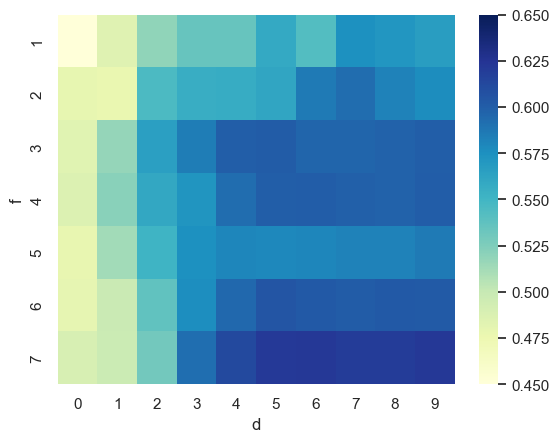

In [42]:
sns.heatmap(data=dataframe, cmap="YlGnBu", vmin=0.45, vmax=0.65)